Import the panda and geopanda libraries that will give access to shapely library commands. Read the supplied geojson and plot it as a geodataframe.

In [1]:

import pandas as pd
import geopandas as gpd


polygonspath = "./polygons_test.GeoJSON"

polygons = gpd.read_file(polygonspath)

polygons

,ix,geometry
0,0,"POLYGON ((-47.83095 -15.71043, -47.81691 -15.7..."
1,1,"POLYGON ((-47.81029 -15.52409, -47.80959 -15.5..."
2,2,"POLYGON ((-47.51741 -15.66989, -47.51729 -15.6..."
3,3,"POLYGON ((-47.65172 -15.68741, -47.65169 -15.6..."
4,4,"POLYGON ((-47.78683 -15.81563, -47.77784 -15.8..."
...,...,...
695,695,"POLYGON ((-47.71776 -15.85125, -47.71519 -15.8..."
696,696,"POLYGON ((-47.61052 -15.87739, -47.61019 -15.8..."
697,697,"POLYGON ((-47.65166 -15.65142, -47.65163 -15.6..."
698,698,"POLYGON ((-47.74000 -15.74298, -47.73973 -15.7..."


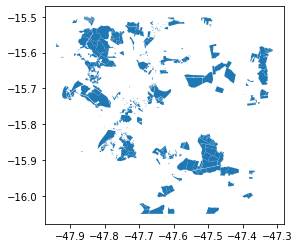

In [2]:
polygons.plot();

In [3]:
polygons.geometry.is_valid

0      False
1       True
2      False
3       True
4       True
       ...  
695     True
696     True
697     True
698     True
699     True
Length: 700, dtype: bool

Normally I would have used the python environment within QGIS itself and run a Fix Geometries - which generates a much more detailed result, even with the problem encountered -, but given that my anaconda environment is not configured to use qgis.core, I opted by using the shapely radius 0 buffer for simplicity.

In [4]:
clean = polygons.geometry.buffer(0)
clean.is_valid

0      True
1      True
2      True
3      True
4      True
       ... 
695    True
696    True
697    True
698    True
699    True
Length: 700, dtype: bool

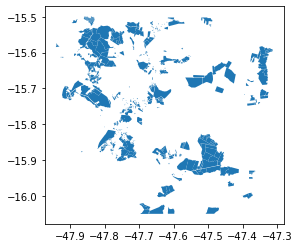

In [5]:
clean.plot();

To calculate the areas in hectares, it is first necessary to know whether the data are in a projected or geographic coordinate system. As it is in WGS84, it is necessary to make the projection. As it is in Brasília, the simplest option is to use UTM 23S.

In [6]:
print(polygons.crs)

epsg:4326


In [8]:
#use geopandas abow 0.7 
projetado = polygons.to_crs({'init':'epsg:31983'})
print(projetado.crs)
projetado.head(2)

+init=epsg:31983 +type=crs


C:\Users\ujorbjo00\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,ix,geometry
0,0,"POLYGON ((196573.660 8261063.340, 198094.560 8..."
1,1,"POLYGON ((198516.559 8281725.429, 198592.751 8..."


In [9]:
projetado["area_ha"] = projetado['geometry'].area/10**4
projetado.head(2)

,ix,geometry,area_ha
0,0,"POLYGON ((196573.660 8261063.340, 198094.560 8...",1902.248236
1,1,"POLYGON ((198516.559 8281725.429, 198592.751 8...",1373.060436


In [10]:
ucspath = "./layer_UCs.GeoJSON"

ucsraw = gpd.read_file(ucspath)

ucs = ucsraw.to_crs({'init':'epsg:31983'})
ucs

C:\Users\ujorbjo00\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,id,codigocnuc,nome,geometriaa,anocriacao,sigla,areaha,perimetrom,atolegal,administra,siglagrupo,uf,municipios,biomaibge,biomacrl,coordregio,fusoabrang,uorg,geometry
0,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,DEC 88.940 de 07/11/1983,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"MULTIPOLYGON (((231383.293 8275841.752, 231361..."
1,79,0000.00.0031,ÁREA DE RELEVANTE INTERESSE ECOLÓGICO CAPETING...,Sim,1985,ARIE,2057.226019,2.943451e+04,DEC 91.303 de 03/06/1985,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,700,"MULTIPOLYGON (((185022.231 8235430.978, 187127..."
2,112,0000.00.0086,FLORESTA NACIONAL DE BRASÍLIA,Sim,1999,FLONA,9336.246392,8.439999e+04,"DEC S/N, de 10/06/1999",Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,22S,701,"MULTIPOLYGON (((177797.108 8255489.790, 177788..."
3,215,0000.00.0159,PARQUE NACIONAL DE BRASÍLIA,Sim,1961,PARNA,42355.541877,1.864032e+05,"DEC 241, de 29/11/1961; LEI 11.285, de 09/03/2006",Federal,PI,DF,"Brasília, Padre Bernardo, Planaltina.",CERRADO,CERRADO,CR10 Goiânia/GO,23S,702,"MULTIPOLYGON (((172291.103 8285639.061, 172336..."
4,220,0000.00.0023,ÁREA DE PROTEÇÃO AMBIENTAL DO PLANALTO CENTRAL,Sim,2002,APA,503423.357610,1.155836e+06,DEC S/N de 10/01/2002,Federal,US,GO/DF,"Planaltina, Padre Bernardo, Brasília, Águas Cl...",CERRADO,CERRADO,CR10 Goiânia/GO,23S,697,"MULTIPOLYGON (((177369.816 8223562.414, 177367..."
5,226,0000.00.0003,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO DES...,Sim,1983,APA,41783.613909,9.343520e+04,DEC 88.940 de 07/11/1983,Federal,US,GO/DF,"Brasília, Águas Lindas de Goiás, Padre Bernardo.",CERRADO,CERRADO,CR10 Goiânia/GO,22S,698,"MULTIPOLYGON (((168542.230 8251222.530, 168064..."
6,254,0000.00.0192,RESERVA BIOLÓGICA DA CONTAGEM,Sim,2002,REBIO,3411.716893,4.681679e+04,DEC S/N de 13/12/2002,Federal,PI,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,703,"MULTIPOLYGON (((191335.956 8271693.572, 191878..."


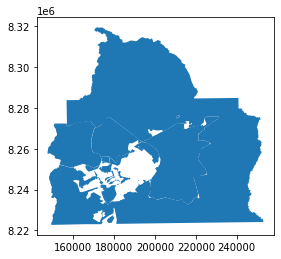

In [11]:
ucs.plot();

In [12]:
merged = gpd.overlay(projetado, ucs, how='intersection')

In [13]:
merged

,ix,area_ha,id,codigocnuc,nome,geometriaa,anocriacao,sigla,areaha,perimetrom,...,administra,siglagrupo,uf,municipios,biomaibge,biomacrl,coordregio,fusoabrang,uorg,geometry
0,0,1902.248236,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,...,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"MULTIPOLYGON (((201217.205 8258450.369, 201297..."
1,2,1263.522786,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,...,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"MULTIPOLYGON (((226492.637 8263130.760, 226387..."
2,3,1180.850654,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,...,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"POLYGON ((215764.431 8263861.809, 215767.750 8..."
3,4,1100.682731,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,...,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"POLYGON ((201460.357 8249478.540, 202425.388 8..."
4,10,834.498043,65,0000.00.0004,ÁREA DE PROTEÇÃO AMBIENTAL DA BACIA DO RIO SÃO...,Sim,1983,APA,82680.803613,1.767007e+05,...,Federal,US,DF,Brasília.,CERRADO,CERRADO,CR10 Goiânia/GO,23S,699,"POLYGON ((207091.192 8248023.381, 207151.359 8..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,696,2.004934,220,0000.00.0023,ÁREA DE PROTEÇÃO AMBIENTAL DO PLANALTO CENTRAL,Sim,2002,APA,503423.357610,1.155836e+06,...,Federal,US,GO/DF,"Planaltina, Padre Bernardo, Brasília, Águas Cl...",CERRADO,CERRADO,CR10 Goiânia/GO,23S,697,"POLYGON ((220444.275 8242884.320, 220481.318 8..."
700,6,965.227671,215,0000.00.0159,PARQUE NACIONAL DE BRASÍLIA,Sim,1961,PARNA,42355.541877,1.864032e+05,...,Federal,PI,DF,"Brasília, Padre Bernardo, Planaltina.",CERRADO,CERRADO,CR10 Goiânia/GO,23S,702,"MULTIPOLYGON (((190474.486 8263521.359, 190550..."
701,252,22.157989,215,0000.00.0159,PARQUE NACIONAL DE BRASÍLIA,Sim,1961,PARNA,42355.541877,1.864032e+05,...,Federal,PI,DF,"Brasília, Padre Bernardo, Planaltina.",CERRADO,CERRADO,CR10 Goiânia/GO,23S,702,"POLYGON ((188317.000 8262753.250, 188458.050 8..."
702,337,10.827463,215,0000.00.0159,PARQUE NACIONAL DE BRASÍLIA,Sim,1961,PARNA,42355.541877,1.864032e+05,...,Federal,PI,DF,"Brasília, Padre Bernardo, Planaltina.",CERRADO,CERRADO,CR10 Goiânia/GO,23S,702,"MULTIPOLYGON (((188148.630 8262920.380, 188163..."


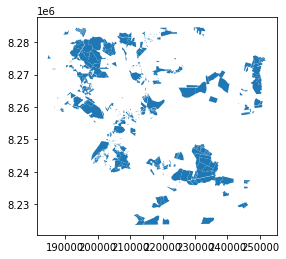

In [14]:
merged["area_intersect"] = merged['geometry'].area/10**4
merged.tail(2)
merged.plot();
merged.to_file("Intersects_UC_polygons.geojson", driver='GeoJSON')

In [15]:
mergedwgs = merged.to_crs({'init':'epsg:4326'})
envelope = mergedwgs.geometry.total_bounds
dissolvido = merged.dissolve(by='fusoabrang')
centroide = dissolvido.centroid
centroidewgs = centroide.to_crs({'init':'epsg:4326'})
print(centroidewgs.geometry[0])

C:\Users\ujorbjo00\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


POINT (-47.63814467966155 -15.7371520209125)


C:\Users\ujorbjo00\Anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [27]:
!pip install ee
!pip install folium
!pip install geehydro

EEException: Please authorize access to your Earth Engine account by running

earthengine authenticate

in your command line, and then retry.

In [ ]:
#https://developers.google.com/earth-engine/python_install
ee.Authenticate()

In [32]:
import ee
import folium
import geehydro
ee.Initialize()

"""if you get HttpError: <HttpError 403 when requesting https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/algorithms?prettyPrint=false&alt=json returned "Permission denied."> 

follow this: https://github.com/google/earthengine-api/issues/136
"""

'if you get HttpError: <HttpError 403 when requesting https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/algorithms?prettyPrint=false&alt=json returned "Permission denied."> \n\nfollow this: https://github.com/google/earthengine-api/issues/136\n'

In [33]:
Mapa = folium.Map(location=[-15.73715202091292, -47.63814467966157], zoom_start=9)

In [34]:
envelope

array([-47.94133472, -16.04985092, -47.31450651, -15.49850083])

In [36]:
aoi=ee.Geometry.Rectangle([-47.94133472, -16.04985092, -47.31450651, -15.49850083])
Sentinel2 = ee.ImageCollection('COPERNICUS/S2').filterBounds(aoi)
Sentinel2 = Sentinel2.filterDate('2020-01-01', '2020-07-08').filterMetadata('CLOUDY_PIXEL_PERCENTAGE', 'less_than', 0.1)
Sentinel2 = Sentinel2.sort('system:time_start').limit(5)
print('Images available in the period:', Sentinel2.size().getInfo())
Sentinel2.first().bandNames().getInfo()

collectionList = Sentinel2.toList(Sentinel2.size())
collectionSize = collectionList.size().getInfo()



Images available in the period: 5


In [37]:
from IPython.display import Image
parameters = {'min': 0,
              'max': 1000,
              'dimensions': 512,
              'bands': ['B4', 'B3', 'B2'],
              'region': aoi}

imagem1=ee.Image(collectionList.get(0)).clip(aoi)
imagem2=ee.Image(collectionList.get(1)).clip(aoi)  
imagem3=ee.Image(collectionList.get(2)).clip(aoi)  
imagem4=ee.Image(collectionList.get(3)).clip(aoi)  
imagem5=ee.Image(collectionList.get(4)).clip(aoi)  

Image(url = imagem4.getThumbUrl(parameters))

In [38]:

fc = ee.FeatureCollection(polygonspath)

In [39]:
NDVI = ee.Image(collectionList.get(4)).normalizedDifference(['B8','B4']).clip(aoi)



palette = ['red', 'yellow', 'green']
ndvi_parameters = {'min': 0,
                   'max': 1,
                   'dimensions': 512,
                   'palette': palette,
                   'region': aoi}
Mapa.addLayer(NDVI, ndvi_parameters)

folium.GeoJson(
    polygonspath,
    name='geojson'
).add_to(Mapa)

Mapa

In [40]:
for i in range(collectionSize):
    ee.batch.Export.image.toDrive(
            image = ee.Image(collectionList.get(i)).normalizedDifference(['B8','B4']).clip(aoi),
            folder = 'sentinel',
            fileNamePrefix = 'SENTINEL2_'+str(i),
            scale=30
        ).start()

In [41]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]
coords = getFeatures(merged)
print(coords)

[{'type': 'MultiPolygon', 'coordinates': [[[[201217.20479858882, 8258450.368771362], [201297.47510586606, 8258245.05367713], [201266.40654666768, 8258320.130165597], [201217.20479858882, 8258450.368771362]]], [[[199219.62532874884, 8260696.780698614], [199617.67999819072, 8260422.900000082], [199973.88135751768, 8260178.079146191], [199945.39050924964, 8260190.198576456], [199831.80556461122, 8260269.596279573], [199698.26902098116, 8260341.653897198], [199577.31797457428, 8260421.159273078], [199474.06086186203, 8260493.191831174], [199378.67898293224, 8260557.618700224], [199278.14591624192, 8260640.145053625], [199219.62532874884, 8260696.780698614]]]]}]


In [45]:
!pip install rasterio
!pip install rasterstats

"""
Many GDAL errors.


Windows

Binary wheels for rasterio and GDAL are created by Christoph Gohlke and are available from his website.

To install rasterio, simply download both binaries for your system (rasterio and GDAL) and run something like this from the downloads folder:

$ pip install -U pip
$ pip install GDAL-2.0.2-cp27-none-win32.whl
$ pip install rasterio-0.34.0-cp27-cp27m-win32.whl
https://pypi.org/project/rasterio/
"""

  Using cached rasterstats-0.15.0-py3-none-any.whl (16 kB)
  Using cached simplejson-3.17.2.tar.gz (83 kB)

'\nMany GDAL errors.\n\n\nWindows\n\nBinary wheels for rasterio and GDAL are created by Christoph Gohlke and are available from his website.\n\nTo install rasterio, simply download both binaries for your system (rasterio and GDAL) and run something like this from the downloads folder:\n\n$ pip install -U pip\n$ pip install GDAL-2.0.2-cp27-none-win32.whl\n$ pip install rasterio-0.34.0-cp27-cp27m-win32.whl\nhttps://pypi.org/project/rasterio/\n'


  Created wheel for simplejson: filename=simplejson-3.17.2-py3-none-any.whl size=55464 sha256=818e6be1f8257f8a6a22f21f2928b68333d02dbbd41c45db3949804c203e7254
  Stored in directory: c:\users\ujorbjo00\appdata\local\pip\cache\wheels\17\72\7d\df0984c925921e22322ea462a6f861e9d0617881192deb9b8d
Successfully built simplejson


In [49]:
import rasterio
import rasterstats
from rasterio.plot import show
resultado=merged
for i in range(collectionSize):
    ndvipath=r"C:\Users\ujorbjo00\Documents\ndvistats-master"+str(i)+".tif"
    ndvix=rasterio.open(ndvipath)
    temp = merged.to_crs(crs=ndvix.crs.data)
    ax = show((ndvix, 1))
    array = ndvix.read(1)
    affine = ndvix.transform
    zs_ndvix = zonal_stats(temp, array, affine=affine, stats=['mean', 'min', 'max', 'std'])
    ndviframe = pd.DataFrame(zs_ndvix)
    resultado = resultado.join(ndviframe, rsuffix='_'+str(i))

resultado

RasterioIOError: C:/Users/ujorbjo00/Documents/ndvistats-master0.tif: No such file or directory

In [267]:
resultado.to_crs({'init':'epsg:31983'}).to_file("ZonalStatsNDVI_Polygons.geojson", driver='GeoJSON')
